# SI 370 - Lab 10.1: Classification

## Objectives:
- Be able to perform classifications using the following methods and interpret their results.
  - Naive Bayes
  - Decision Tree
  - Random Forest
  
- Perform test/train split and cross-validation


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import pydot_ng as pydot
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os

# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


In [25]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the usual dataset
df_iris = sns.load_dataset('iris')
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [27]:
# split into train and test (we'll see a better way later)
np.random.seed(200)
msk = np.random.rand(len(df_iris)) < 0.7
df_iris_train = df_iris[msk]
df_iris_test = df_iris[~msk]

# 1. Decision Trees

## 1.1 Train a decision tree classifier

We will train a decision tree classifier to classify iris species. Here are the specifications:
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features


In [28]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=1,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# We can use `graphviz` combined with `pydot` to visualize the decision tree. You will need to install both packages in order to proceed. Installation is (supposed to be) easy.
- __First, install graphviz__, go to one of the links below depending on your system
  - Mac OS: use "brew install graphviz" (recommended) or go to http://graphviz.org/Download_macos.php 
  - Windows: http://graphviz.org/Download_windows.php
- __Second, install pydot-ng in Anaconda__. Do either of the following in your terminal depending on your default python environment:
  - `conda install pydot-ng`
    - if your default python is 2
  - `conda install -n python3 pydot-ng`
    - if your default python is 3
    - you may need to replace `python3` with the actual environment name you created.
- __Third, you might need to update scikit-learn__. Do either of the following:
  - `conda update scikit-learn`
  - `conda update -n python3 scikit-learn`

For your information, "ng" in `pydot-ng` stands for "next generation". The original `pydot` package is only compatible with Python 2. Also note that you should not the graphviz distribution provided by Anaconda, which has compatability issues.

After installations complete, you need to __restart__ the kernel, and __rerun all the cells above__.

In [29]:
# this is a utility function to set the right path if you're using windows
if(os.sys.platform == "win32"):
    if os.path.isdir("C:/Program Files (x86)/Graphviz2.38/bin/"):
        print("graphviz found in C:/Program Files (x86)/Graphviz2.38/bin/")
        os.environ["PATH"] = os.environ["PATH"] +os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    elif os.path.isdir("C:/Program Files/Graphviz2.38/bin/"):
        os.environ["PATH"] = os.environ["PATH"] +os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'
        print("graphviz found in C:/Program Files/Graphviz2.38/bin/")
    else:
        print("Can't find graphviz, make sure it's installed")

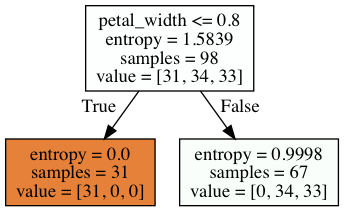

In [30]:
dot_data = sksix.StringIO()
sktree.export_graphviz(dt_model, out_file=dot_data,
                       feature_names=df_iris_train.columns[:4],
                       filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
ipd.Image(graph.create_png())

To interpret the above plot, please read through the following paragraphs quoted from http://www.thegrimmscientist.com/tutorial-decision-trees/, which has slightly different results than our data set because they used alightly different data.  Their results looks like:
![](http://www.thegrimmscientist.com/content/images/2017/06/TreeDepth1.png)
> This image needs a bit of explanation. The top node represents the whole dataset. The whole dataset has 150 samples, as seen in the third line of that first node. We'll explain entropy more later, but for now, think of it as a formalization of the amount of uncertainty in the data. The first line on the top node gives us the decision our tree magically found. When that decision "petal width is less than or equal to 0.80 cm" is true for a given sample, that sample is assigned to the bottom left node. When it is false, the sample is assigned to the bottom right node.

>On these two leaf nodes, the number of samples is shown on the second line. The number of samples broken down by class is on the third line. On the left leaf node, all 50 of the samples in class 1 and none from the other two classes are represented. Given the decision and the data at hand, we are certain to have a sample in class 1 (setosa). Since we are totally certain about that, uncertainty (entropy) is 0.

>When our petal width <= 0.80 decider is false, the given sample is assigned to the right node. It works out that all 50 samples from class 2 (versicolor) and all 50 samples from class 3 (virginica) are assigned to this right leaf. Thus, when we're at this leaf given the decision, we're evenly unsure whether we're in class 2 or class 3. The amount of uncertainty this works out to be is 1.0. Again, we'll explain the math and meaning behind that later.

## Exercise 1:
1. Train a decision tree with `max_depth=2`. Plot it as a graph (same below).
2. Train a decision tree with `max_depth=3`.
3. Train a decision tree without `max_depth` limitation.


_NOTE_: see http://www.thegrimmscientist.com/tutorial-decision-trees/ for awesome visualizations and explanations to intuitively understand what decision tree algorithm is doing.

<font color="red">Modify the following cell to create a function that takes
a single parameter (depth) and uses that parameter to call the code above to 
set the max_depth attribute on the sktree.DecisionTreeClassifier.

In [31]:
### YOUR CODE HERE -- it might be easier to create a function that takes the desired max_depth as a 
### parameter

## 1.2 Deploying a Decision Tree Classifier

We train a decision tree with `max_depth=2` to cluster the irises into three species.

<font color ="red">Now use your newly created function to call max_depth=2, max_depth=3 and no limit on max_depth.  Examine the differences using comparePlot (below)

In [32]:
# first train the model with max_depth = 2 (similar to the training your did above)



In [ ]:
# this is testing the model 
predicted_labels = dt_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_label_tree'] = predicted_labels
df_iris_test.sample(10)

In [ ]:
# utility class to compare the predictions versus ground truth
def comparePlot(input_frame,real_column,predicted_column):
    df_a = input_frame.copy()
    df_b = input_frame.copy()
    df_a['label_source'] = 'Species'
    df_b['label_source'] = 'Classifier'
    df_a['label'] = df_a[real_column]
    df_b['label'] = df_b[predicted_column].apply(lambda x: 'Predict %s'%x)
    df_c = pd.concat((df_a, df_b), axis=0, ignore_index=True)
    sns.lmplot(x='sepal_length', y='sepal_width', col='label_source',
               hue='label', data=df_c, fit_reg=False, size=4);

In [ ]:
# see the difference
comparePlot(df_iris_test,"species","predicted_label_tree")

<font color="red">Now repeat the above steps with max_depth=3 and no limit on max_depth

# 2. Random Forest

Let us build a random forest classifier to classify irises into three species.
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features

In [ ]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True)
rf_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

<font color="red">Use the same approach that you did in predicting the Decision Tree Classifier.  Note that you don't need to use .sample()

In [ ]:
# now do the predicting... use the same approach as you did in testing the Decision Tree Classifier above,
# but don't include the .sample() line


In [ ]:
comparePlot(df_iris_test,"species","predicted_rf_tree")

We can also check __feature importance__ as dumped by the model.

In [ ]:
# Check feature importance
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=df_iris_train.columns[:4]).plot(kind='barh')

# 3. Naive Bayes

## 3.1 Train a Naive Bayes Classifier

We will first explore using Gaussian Naive Bayes model to classify irises into either "setosa" or "not setosa".

When you train a classifier, you need to think about the following three basic questions:
- What is the prediction objective?
- What are the possible classes?
- What are the features?

In this example, the answers to the above questions are:
- To predict whether an iris instance is setosa or not.
- Two possible classes: "setosa" and "not setosa".
- Features: 
  - petal_length only (for the demonstration)
  - petal_length and petal_width (for the excercise)

<font color="red">Construct the class labels
create a new column called 'is_setosa' that's set to 'setosa' if the species is setosa and 'not_setosa' 
if it's not. </font>


In [23]:
# Your code here



With the class labels ready, let's build a Naive Bayes model. We start with a model that takes only one feature, sepal_length.

In [ ]:
# train the model
# train the model
gnb_model = sknb.GaussianNB()
# given sepal length, predict if setosa
gnb_model.fit(df_iris_train[['sepal_length']],df_iris_train['is_setosa'])

Now we use the model to make predictions on the test dataset.

In [ ]:
# test the model
# test the model
y_pred = gnb_model.predict(df_iris_test[['sepal_length']])
df_iris_test['predicted_nb'] = y_pred

In [ ]:
comparePlot(df_iris_test,"is_setosa","predicted_nb")